In [11]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel|column_description'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

Toggle code

var_type (8079, 14)
Wall time: 20.1 s


In [12]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    print(column_description[val+"W17"])

Lib-Auth value: Young people today don't respect traditional British values
Lib-Auth value: For some crimes, death penalty most appropriate sentence
Lib-Auth value: Schools should teach children to obey authority
Lib-Auth value: Censoring films/magazines necessary to uphold moral standards
Lib-Auth value: Lawbreakers should be given stiffer sentences
Left-right value: Government should redistribute incomes
Left-right value: Big business takes advantage of ordinary people
Left-right value: Ordinary working people do not get their fair share
Left-right value: There is one law for the rich and one for the poor
Left-right value: Management will always try to get the better of employees


In [114]:
del BES_Panel

In [117]:
# search(BES_Panel,"al_scale")
# memory_use(locs = locals().items())
gc.collect()

56

In [14]:
match(BES_Panel,"al1")

al1W6         30258
al1W13        31136
al1W16        37959
al1W17        34366
al1W1_W5      41874
al1W14W15     36172
al1W7_W9      39857
al1W10_W12    34991
dtype: int64

In [15]:
wave_list = ["W1_W5","W6","W7_W9","W10_W12","W13","W14W15","W16","W17"]
friendly_wave = BES_file_manifest[BES_file_manifest["Only_or_Combined"]=="Only"].set_index("Wave No")["Friendlier_Description"]


In [16]:
wts_to_waves = {"wt_full_W1":"W1_W5","wt_full_W2":"W1_W5","wt_full_W3":"W1_W5","wt_full_W4":"W1_W5","wt_full_W4":"W1_W5",
 'wt_full_W5':"W1_W5", 'wt_new_W6':"W6", 'wt_new_W7':"W7_W9", 'wt_new_W8':"W7_W9", 'wt_new_W9':"W7_W9",
 'wt_new_W10':"W10_W12", 'wt_new_W11':"W10_W12", 'wt_new_W12':"W10_W12", 'wt_new_W13_result':"W13",
 'wt_new_W14':"W14W15", 'wt_new_W15':"W14W15", 'wt_new_W16':"W16", 'wt_new_W17':"W17",}

In [83]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
# val = "al1"

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull()
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
                             ## weighted means
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1


Wall time: 17.4 s


In [18]:
friendly_wave

Wave No
20                    2020: Summer
19          2019 GE: Post-Election
18               2019 GE: Campaign
17           2019 GE: Pre-Campaign
16      2019 : Post Euro Elections
15                    2019: Spring
14                    2018: Summer
13          2017 GE: Post-Election
12               2017 GE: Campaign
11           2017 GE: Pre-Campaign
10                    2016: Autumn
9     2016 EU Ref: Post-Referendum
8            2016 EU Ref: Campaign
7        2016: Pre Local Elections
6           2015 GE: Post-Election
5                2015 GE: Campaign
4            2015 GE: Pre-Campaign
3                     2014: Autumn
2                     2014: Summer
1                     2014: Spring
Name: Friendlier_Description, dtype: object

In [19]:
scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)

In [35]:
len(normalised_store["value"].unique())

10

In [93]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
all_markers = filled_markers[0:10]


Text(0, 0.5, 'Mean Answer (Agree+/Disagree-) Indexed to Spring 2014')

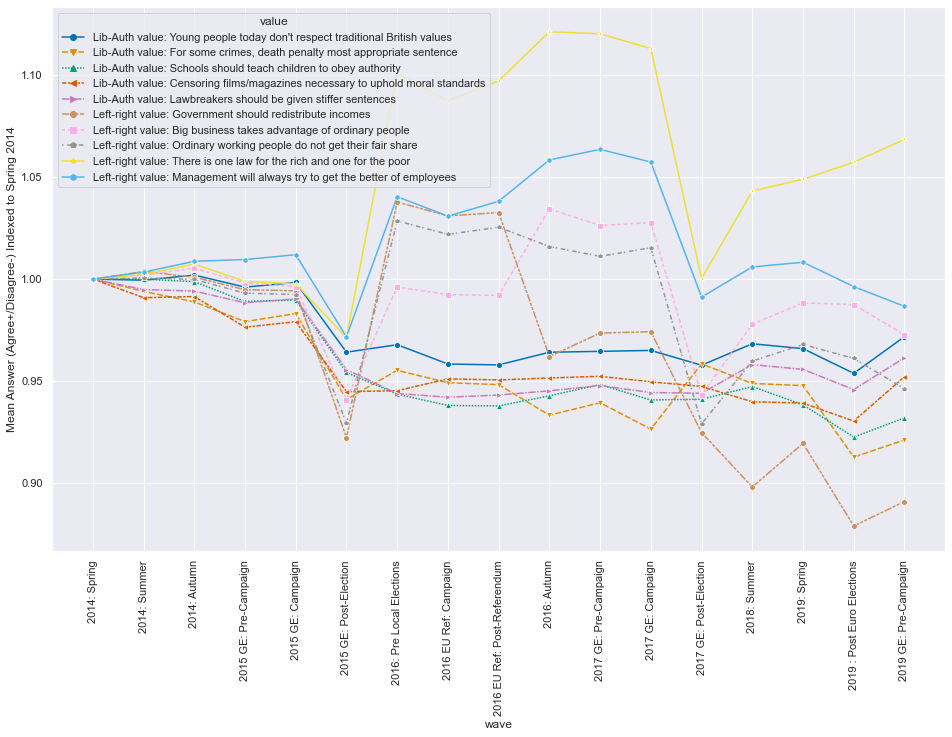

In [94]:
plt.figure(figsize=(16,10));
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              "",""]
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store,x="wave",y="score",hue="value",
             style="value",markers=all_markers,dashes=dash_styles,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014")

In [50]:
lib_markers = filled_markers[0:5]
econ_markers = filled_markers[5:10]

Text(0.5, 1.0, 'Onward March of Liberalism\n(British Election Study Online Panel Data)')

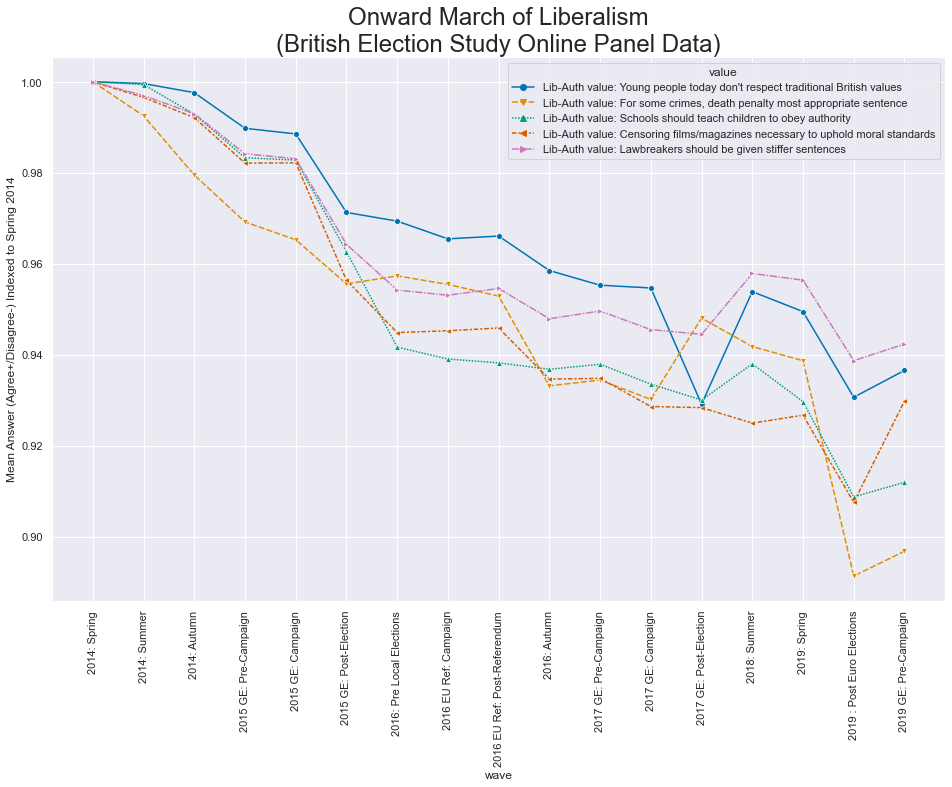

In [49]:
plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=lib_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("Onward March of Liberalism\n(British Election Study Online Panel Data)",fontsize=24)

Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)')

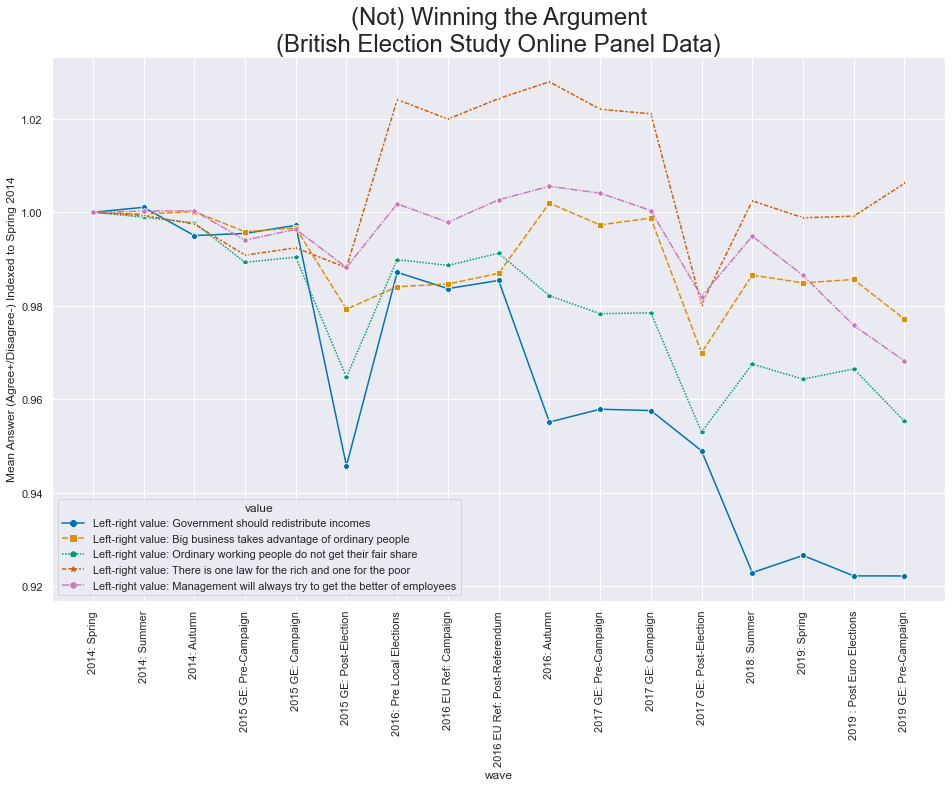

In [51]:
plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=econ_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)",fontsize=24)

In [52]:
mean_lr_scales = BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)
mean_al_scales = BES_Panel[search(BES_Panel,"al_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1)

In [53]:
mean_al_scale_groups = pd.qcut(mean_al_scales,q=3)
mean_lr_scale_groups = pd.qcut(mean_lr_scales,q=3)

In [ ]:
# mean_al_scale_groups.value_counts()

In [ ]:
# BES_Panel[search(BES_Panel,"lr_scale").index].apply(lambda x: x.cat.codes).replace(-1,np.nan).mean(axis=1).notnull().sum()

In [54]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[0]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.35 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Socially Liberal 1/3 Public>')

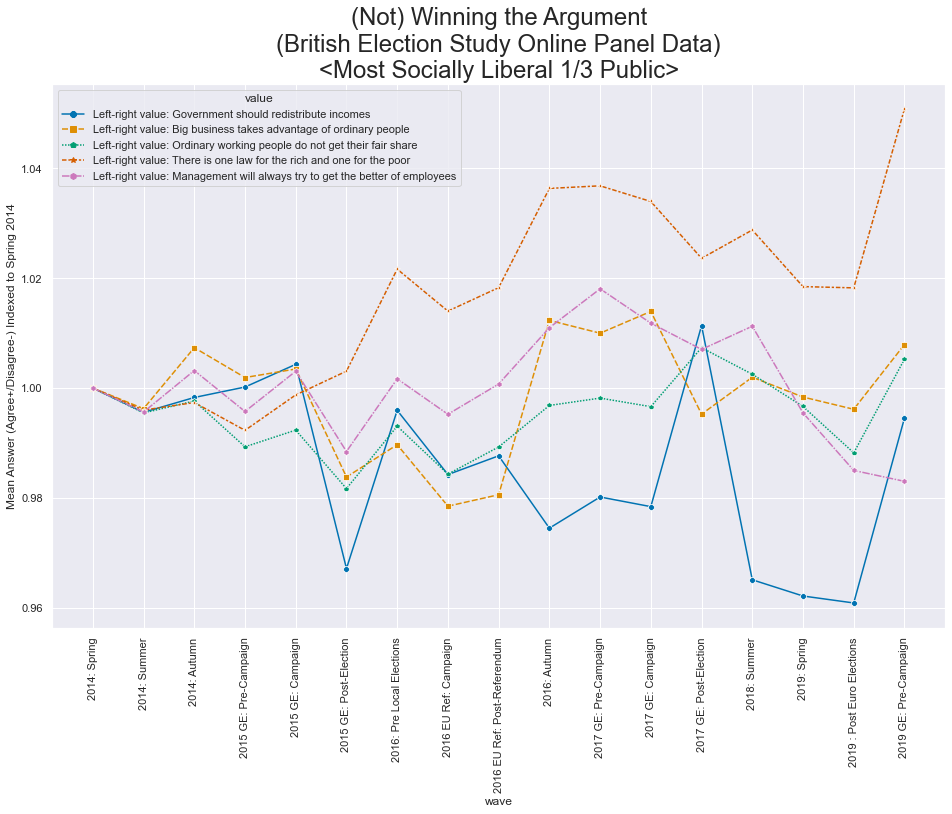

In [55]:
plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=econ_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Socially Liberal 1/3 Public>",fontsize=24)

In [56]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[1]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.92 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Neither Socially Liberal nor Authoritarian 1/3 Public>')

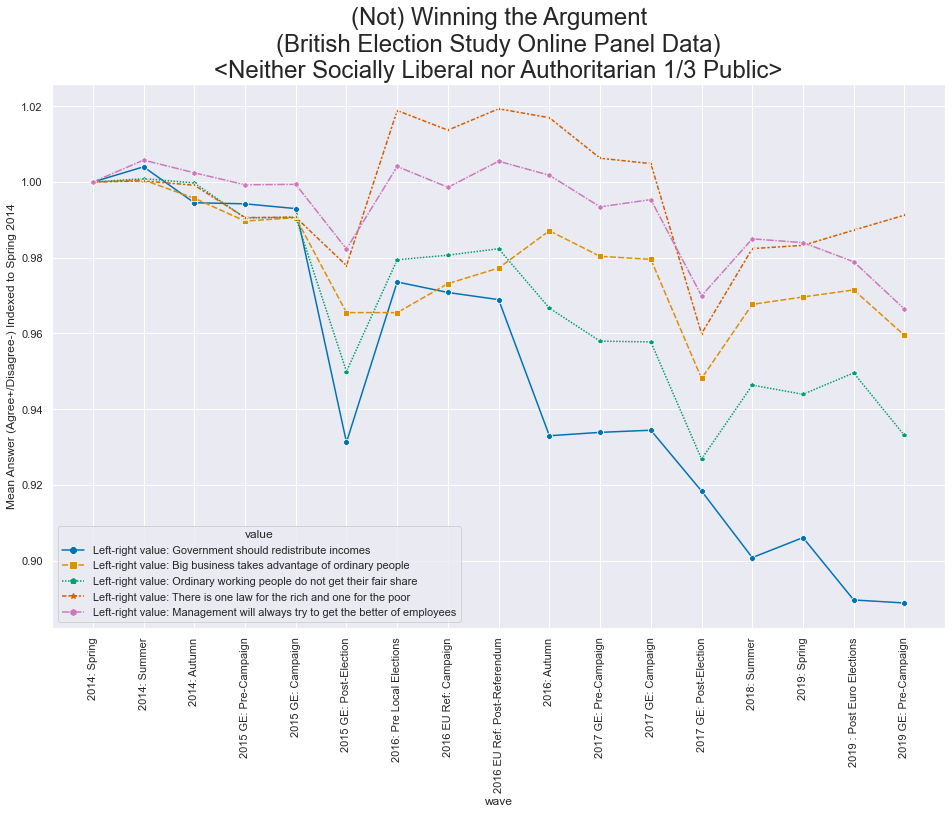

In [57]:
plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=econ_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Neither Socially Liberal nor Authoritarian 1/3 Public>",fontsize=24)

In [58]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_al_scale_groups==mean_al_scale_groups.cat.categories[2]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

Wall time: 6.1 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Authoritarian 1/3 Public>')

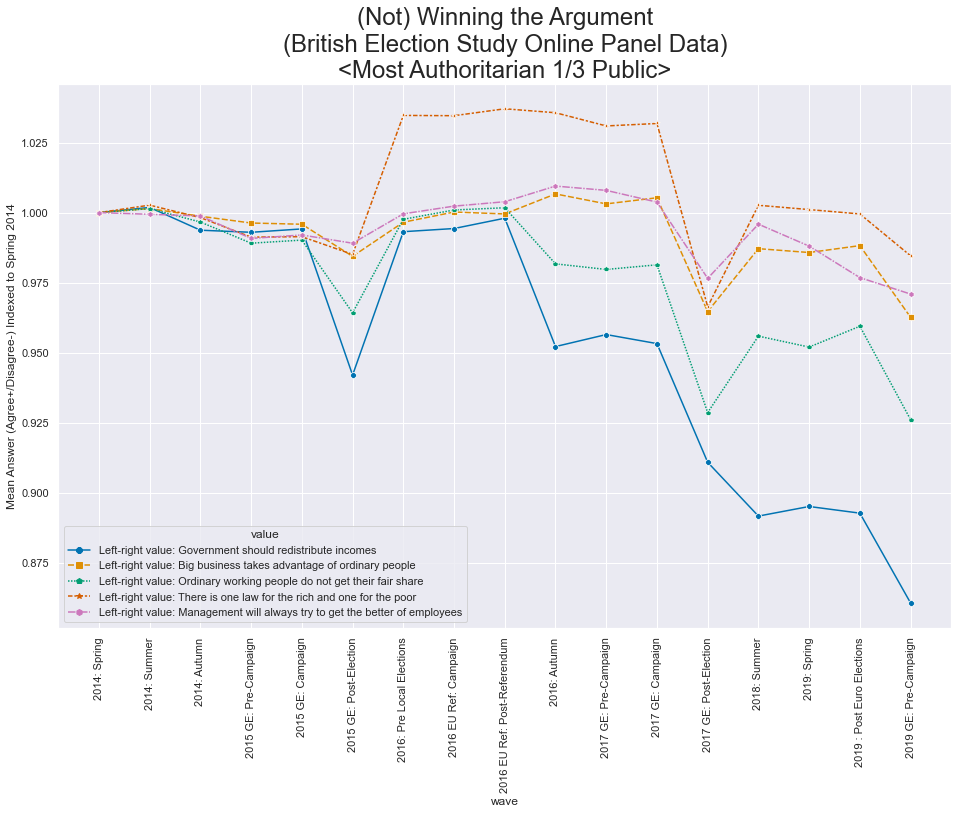

In [59]:
plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Left-right" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=econ_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Authoritarian 1/3 Public>",fontsize=24)

Wall time: 7.18 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Left 1/3 Public>')

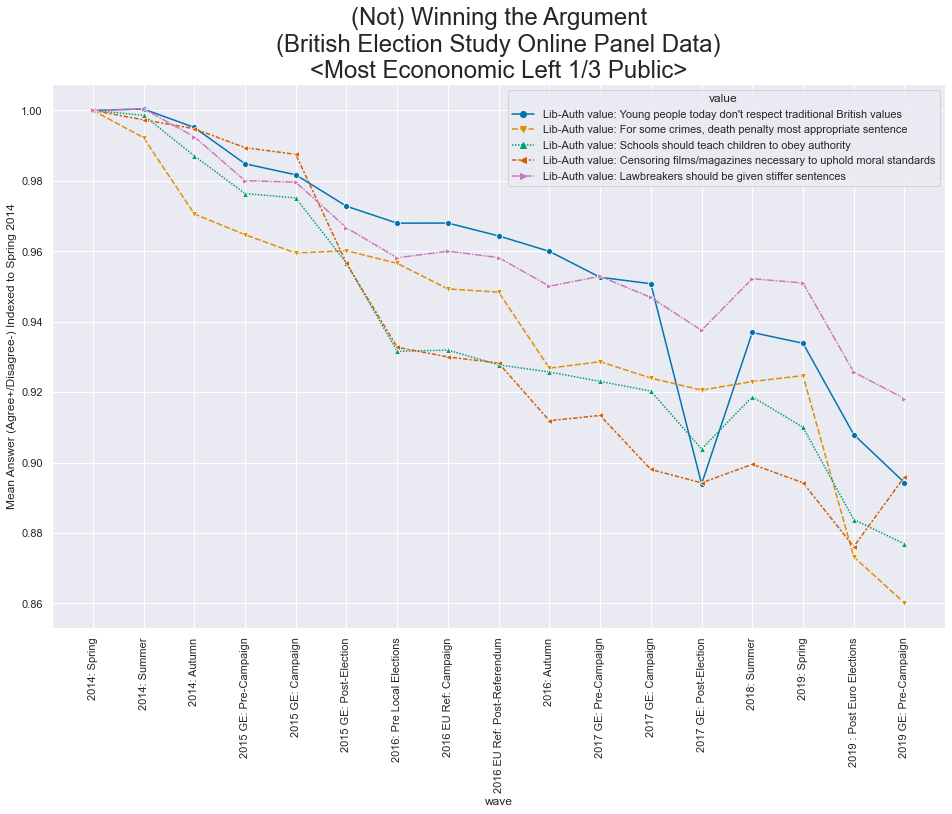

In [62]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[0]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=lib_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Left 1/3 Public>",fontsize=24)

Wall time: 6.29 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Centre 1/3 Public>')

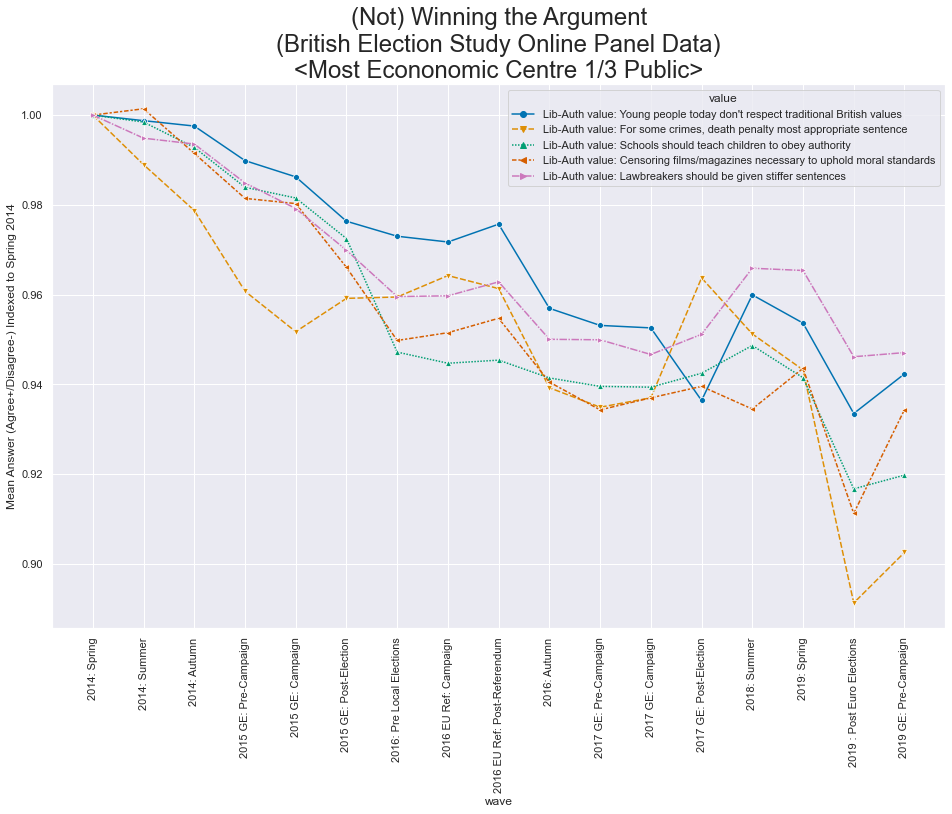

In [63]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[1]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=lib_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Centre 1/3 Public>",fontsize=24)

Wall time: 6.95 s


Text(0.5, 1.0, '(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Right 1/3 Public>')

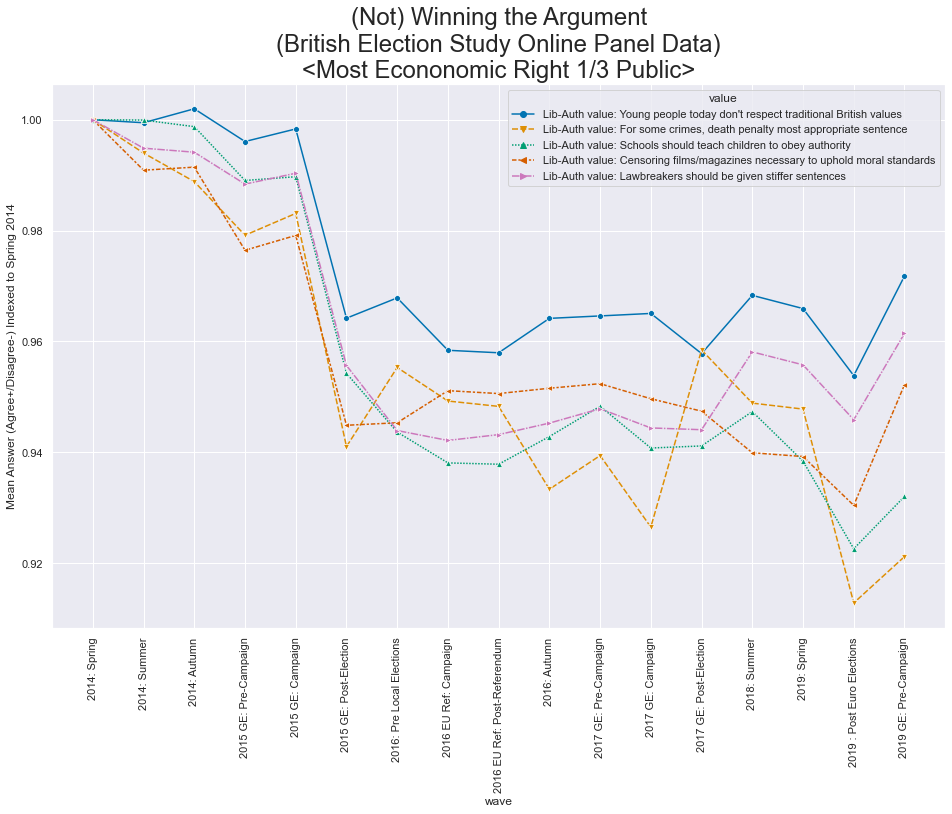

In [64]:
%%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
value_mask = mean_lr_scale_groups==mean_lr_scale_groups.cat.categories[2]

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(0,17):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]
        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        mask  =BES_Panel[wt].notnull() & temp.notnull() & value_mask
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
        store.loc[count] = [column_description[val+"W17"],
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1

scores = store["score"].copy()
scores[store["wave"]!="2014: Spring"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:17], ordered=True)        

plt.figure(figsize=(16,10));
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store[normalised_store["value"].apply(lambda x: "Lib-Auth" in x)],
             x="wave",y="score",hue="value",
             style="value",markers=lib_markers,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.title("(Not) Winning the Argument\n(British Election Study Online Panel Data)\n<Most Econonomic Right 1/3 Public>",fontsize=24)

In [ ]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).mean() )

In [65]:
["wt_new_W"+str(x) for x in range(5,20)]

['wt_new_W5',
 'wt_new_W6',
 'wt_new_W7',
 'wt_new_W8',
 'wt_new_W9',
 'wt_new_W10',
 'wt_new_W11',
 'wt_new_W12',
 'wt_new_W13',
 'wt_new_W14',
 'wt_new_W15',
 'wt_new_W16',
 'wt_new_W17',
 'wt_new_W18',
 'wt_new_W19']

In [66]:
search(BES_Panel,"wt_new")

wt_new_W10           30237
wt_new_W11           30956
wt_new_W14           31063
wt_new_W15           30842
wt_new_W16           37959
wt_new_W1_W16         2427
wt_new_W18           37825
wt_new_W6W7          21081
wt_new_W2W6          23163
wt_new_W2W6W7        17076
wt_new_W9_W13        12562
wt_new_W12           34394
wt_new_W1_W11         6473
wt_new_W1_W12         5833
wt_new_W1_W13         5301
wt_new_W6_W11         9373
wt_new_W6_W12         8398
wt_new_W6_W13         7622
wt_new_W11_W13       21520
wt_new_W13W16        14647
wt_new_W13_result    31135
wt_new_W6W16          9587
wt_new_W2W16          8388
wt_new_W17           34366
wt_new_W13W17        15744
wt_new_W6W13W19       8743
wt_new_W9W19         13604
wt_new_W13_W19        5861
wt_new_W13W19        15811
wt_new_W16W19        21840
wt_new_W17W18W19     19000
wt_new_W19_result    32177
wt_new_W9            30036
wt_new_W8            33502
wt_new_W7            30895
wt_new_W6            30073
wt_new_W13W14        20393
w

In [67]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).mean().mean() )

-0.014879498159097643

-0.02804763088121018

-0.023356072820605533

-0.003768952026623625

-0.021776114326487662

-0.027970791783628268

-0.014060689218311424

-0.014593114016764755

0.0093451503316232

-0.0007967559095358189

In [68]:
for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:
    display( BES_Panel[[val+x for x in wave_list]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1).var().mean() )

0.7057736954471735

0.7070298942643297

0.6308896911628498

0.8551565757962781

0.5552962150375096

0.7880393418556941

0.7174980760496087

0.7345782540169123

0.7396648477695692

0.8230506692799218

In [ ]:
# .1-.2 pts over a 5 year period

# 0-4 scale

# 100 yrs -> takes you across the whole scale

# max_date= "2020.05.01"
# import datetime
# date = datetime.datetime.strptime(max_date, "%Y.%m.%d")
# date.ctime()

In [69]:
store

,value,wave,score
0,Lib-Auth value: Young people today don't respe...,2014: Spring,2.879538
1,Lib-Auth value: Young people today don't respe...,2014: Summer,2.877976
2,Lib-Auth value: Young people today don't respe...,2014: Autumn,2.885225
3,Lib-Auth value: Young people today don't respe...,2015 GE: Pre-Campaign,2.868223
4,Lib-Auth value: Young people today don't respe...,2015 GE: Campaign,2.874753
...,...,...,...
165,Left-right value: Management will always try t...,2017 GE: Post-Election,2.076661
166,Left-right value: Management will always try t...,2018: Summer,2.107592
167,Left-right value: Management will always try t...,2019: Spring,2.112446
168,Left-right value: Management will always try t...,2019 : Post Euro Elections,2.087412


In [71]:
store

,value,wave,score
0,Lib-Auth value: Young people today don't respe...,2014: Spring,2.879538
1,Lib-Auth value: Young people today don't respe...,2014: Summer,2.877976
2,Lib-Auth value: Young people today don't respe...,2014: Autumn,2.885225
3,Lib-Auth value: Young people today don't respe...,2015 GE: Pre-Campaign,2.868223
4,Lib-Auth value: Young people today don't respe...,2015 GE: Campaign,2.874753
...,...,...,...
165,Left-right value: Management will always try t...,2017 GE: Post-Election,2.076661
166,Left-right value: Management will always try t...,2018: Summer,2.107592
167,Left-right value: Management will always try t...,2019: Spring,2.112446
168,Left-right value: Management will always try t...,2019 : Post Euro Elections,2.087412


In [ ]:
normalised_store["score"]/scores.fillna(method='ffill')

In [70]:
scores

0      2.879538
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
165         NaN
166         NaN
167         NaN
168         NaN
169         NaN
Name: score, Length: 170, dtype: float64

In [72]:
normalised_store["score"]

0      1.000000
1      0.999457
2      1.001975
3      0.996071
4      0.998338
         ...   
165    0.991187
166    1.005951
167    1.008268
168    0.996319
169    0.986652
Name: score, Length: 170, dtype: float64

In [76]:
search(BES_Panel,"wt_").sort_values()

wt_new_W1_W16      2427
wt_new_W1_W14      4191
wt_new_W1_W13      5301
wt_new_W1_W12      5833
wt_new_W13_W19     5861
                  ...  
wt_new_W12        34394
wt_daily_W12      34394
wt_daily_W18      37825
wt_new_W18        37825
wt_new_W16        37959
Length: 69, dtype: int64

In [ ]:
# wt_new_W1_W16      2427

# al1W6         30258
# al1W13        31136
# al1W16        37959
# al1W17        34366
# al1W1_W5      41874
# al1W14W15     36172
# al1W7_W9      39857
# al1W10_W12    34991

In [108]:
# %%time
store = pd.DataFrame(columns = ["value","wave","score"])
count= 0 
# val = "al1"

for val in ["al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",]:

    for wt_no in range(4,16):
        wt_list = list(wts_to_waves.keys())
        wt = wt_list[wt_no]

        temp = BES_Panel[[val+wts_to_waves[wt]]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan))[val+wts_to_waves[wt]]
        per_wave_name = wt.replace("_result","").split("_")[-1]
        wt = "wt_new_W1_W16"
        mask  =BES_Panel[wt].notnull() & temp.notnull()# BES_Panel["wt_new_W1_W16"].notnull()
        mean  =weighted_mean(list(zip(temp[mask],BES_Panel[wt][mask])))
                             ## weighted means
        description = column_description[val+"W17"]
        store.loc[count] = [description,
                            friendly_wave.loc[ int(per_wave_name.replace("W",""))],
                            mean]

        count = count+1
#

In [109]:
scores = store["score"].copy()
scores[store["wave"]!="2015 GE: Campaign"]=np.nan

normalised_store = store.copy()

normalised_store["score"] = normalised_store["score"]/scores.fillna(method='ffill')
normalised_store["wave"] = normalised_store["wave"].astype('category').cat.set_categories(friendly_wave.values[::-1][0:16], ordered=True)

(0.92, 1.08)

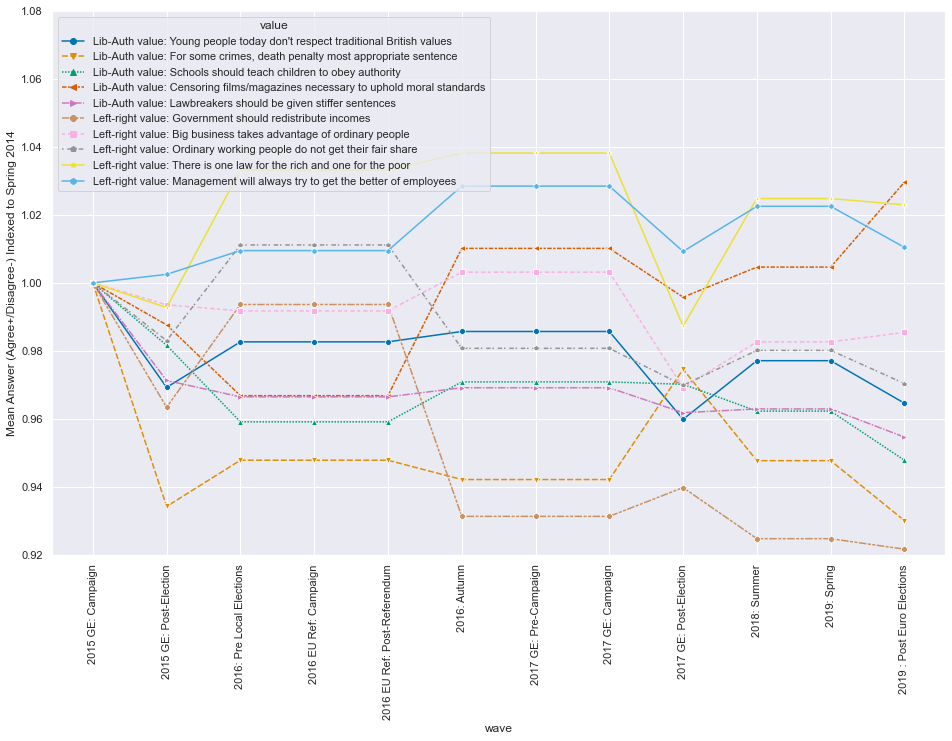

In [111]:
plt.figure(figsize=(16,10));
dash_styles = ["",
               (4, 1.5),
               (1, 1),
               (3, 1, 1.5, 1),
               (5, 1, 1, 1),
               (5, 1, 2, 1, 2, 1),
               (2, 2, 3, 1.5),
               (1, 2.5, 3, 1.2),
              "",""]
# filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
sns.lineplot(data=normalised_store,x="wave",y="score",hue="value",
             style="value",markers=all_markers,dashes=dash_styles,
            );
plt.xticks(rotation=90);
plt.ylabel("Mean Answer (Agree+/Disagree-) Indexed to Spring 2014");
plt.ylim([.92,1.08])

In [97]:
normalised_store

,value,wave,score
0,Lib-Auth value: Young people today don't respe...,2014: Spring,1.000000
1,Lib-Auth value: Young people today don't respe...,2014: Summer,1.000000
2,Lib-Auth value: Young people today don't respe...,2014: Autumn,1.000000
3,Lib-Auth value: Young people today don't respe...,2015 GE: Pre-Campaign,1.000000
4,Lib-Auth value: Young people today don't respe...,2015 GE: Campaign,1.000000
...,...,...,...
155,Left-right value: Management will always try t...,2017 GE: Campaign,1.028483
156,Left-right value: Management will always try t...,2017 GE: Post-Election,1.009254
157,Left-right value: Management will always try t...,2018: Summer,1.022537
158,Left-right value: Management will always try t...,2019: Spring,1.022537
